# Part C: Application - Car Insurance Claim Predicter

## Visuals

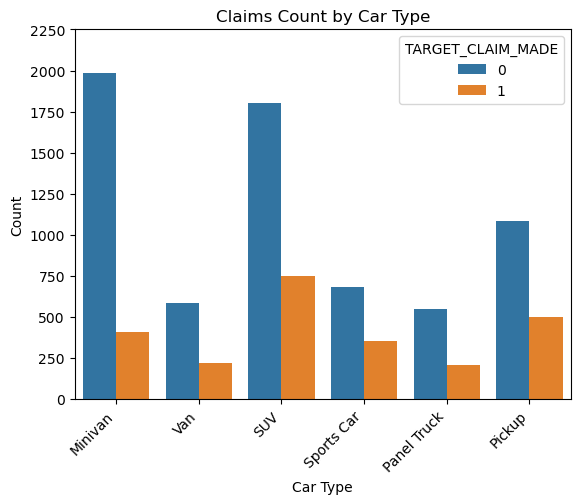

In [242]:
import pandas as pd
original_data = pd.read_csv("./data/dataset_not_encoded.csv")
processed_data = pd.read_csv("./data/dataset.csv")

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Count Claims by Car Type
ax = sns.countplot(x=original_data["CAR_TYPE"], hue=original_data["TARGET_CLAIM_MADE"].astype(str), data=original_data)
ax.set_title("Claims Count by Car Type")
ax.set_ylabel("Count")
ax.set_xlabel("Car Type")
ax.set_xticks(ax.get_xticks())
ax.set_yticks(ax.get_yticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

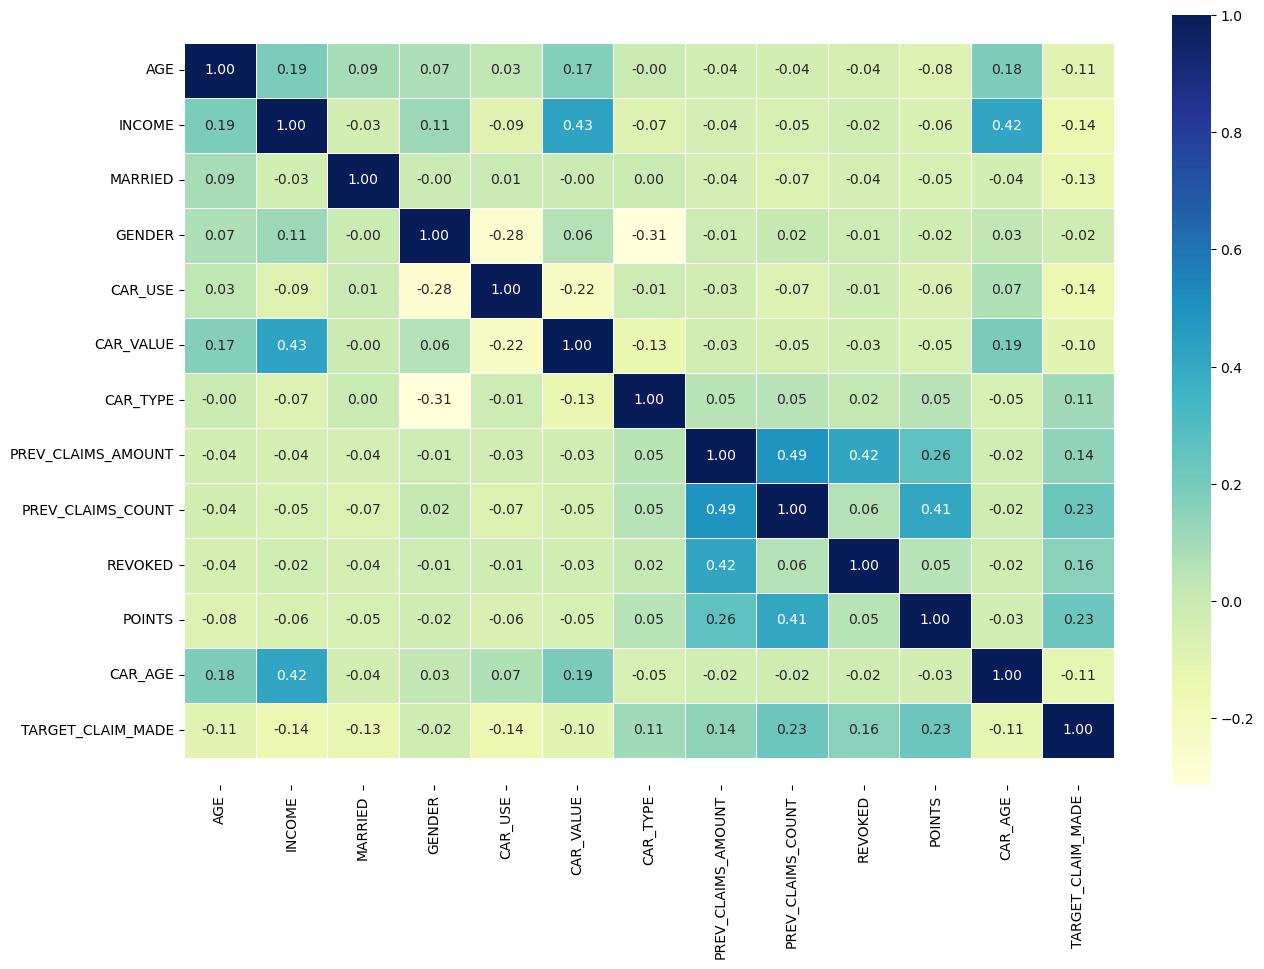

In [243]:
# Display correlation matrix
correlation = processed_data.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(correlation,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

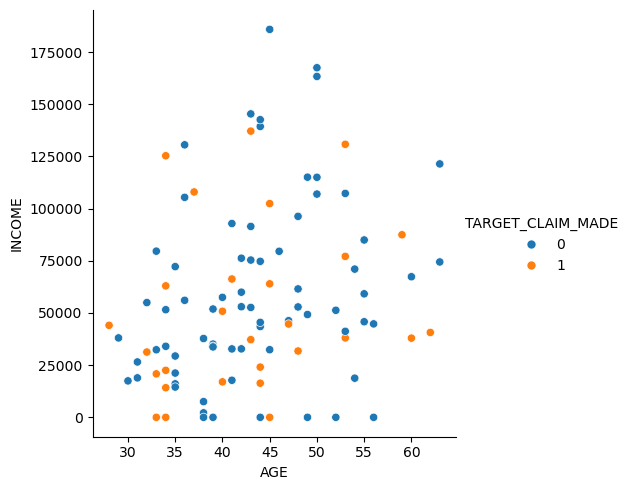

In [244]:
# # Display income, age, and claim status
sns.relplot(data=original_data.head(100), x="AGE", y="INCOME", hue="TARGET_CLAIM_MADE")
plt.show()

## Modeling

In [245]:
# Split data into features and target sets
X = processed_data.drop(["TARGET_CLAIM_MADE"], axis=1)
y = processed_data["TARGET_CLAIM_MADE"]

print(X.shape,y.shape)

(9129, 12) (9129,)


In [246]:
from sklearn.model_selection import train_test_split
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42, stratify=y)

# Setup model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

## Evaluation

In [247]:
score = model.score(X_test, y_test)

print("Accuracy {0:.2f}%".format(score.item() * 100))

Accuracy 74.15%


In [248]:
from sklearn import metrics
y_pred = model.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.96      0.85      2007
           1       0.57      0.13      0.22       732

    accuracy                           0.74      2739
   macro avg       0.66      0.55      0.53      2739
weighted avg       0.70      0.74      0.68      2739



## User Interface

In [249]:
import ipywidgets as widget
import random
column_names = X.columns

age_input = widget.HBox([widget.Label(value="Age"), widget.BoundedIntText(min=18,max=100, step=1)])
income_input = widget.HBox([widget.Label(value="Yearly Income"),widget.BoundedFloatText(min=0, max=1000000,step=1000.00)])
car_value_input = widget.HBox([widget.Label(value="Car Value"),widget.BoundedFloatText(min=1000, max=100000,step=100.00)],layout=widget.Layout(width='100%'))
prev_claims_amount_input = widget.HBox([widget.Label(value="Previous Claims Amount"),widget.BoundedFloatText(min=0, max=100000,step=100.00)])
prev_claims_input = widget.HBox([widget.Label(value="Number of Previous Claims"),widget.BoundedIntText(min=0,max=100, step=1)])
points_input = widget.HBox([widget.Label(value="Insurance Points"), widget.BoundedIntText(min=0,max=20, step=1)])
car_age_input = widget.HBox([widget.Label(value="Car Age (Years)"),widget.BoundedIntText(min=0,max=100, step=1)])
married_input = widget.RadioButtons(description="Married? ", options=[("Yes",1),("No",0)],disabled=False)
gender_input = widget.RadioButtons(description="Gender ", options=[("Male",1),("Female",0)],disabled=False,indent=True)
car_use_input = widget.HBox([widget.Label(value="Car Use Type"), widget.Dropdown(options=[("Private",1),("Commercial",0)],disabled=False)])
car_type_input = widget.HBox([widget.Label(value="Car Type"), widget.Dropdown(options=[("Minivan",0),("Van",1),("SUV",2),("Sports Car",3),("Panel Truck",4),("Pickup",5)], disabled = False)])
revoked_input = widget.RadioButtons(description="Licensed Revoked? ", options=[("Yes",1),("No",0)],disabled=False)

customer_radio_widgets = widget.HBox([gender_input,married_input,revoked_input],layout=widget.Layout(margin="0 0 20px 0"))
customer_text_widgets = widget.HBox([age_input,income_input,],layout=widget.Layout(margin="0 0 20px 0"))
claims_widgets = widget.VBox([points_input,prev_claims_input,prev_claims_amount_input,],layout=widget.Layout(margin="0 0 20px 0"))
vehicle_widgets = widget.VBox([car_use_input,car_age_input,car_type_input,car_value_input],layout=widget.Layout(margin="0 0 20px 0"))

button_predict = widget.Button( description='Predict' )
button_simulate = widget.Button( description='Simulate' )
button_output = widget.Label(value='Press the \"Simulate\" button to prepopulate fields. Press the \"Predict\" button see the result')

vb=widget.VBox([
    customer_text_widgets,
    customer_radio_widgets,
    claims_widgets,
    vehicle_widgets,
    widget.HBox([button_predict,button_simulate]),
    button_output
])

def on_click(b):
    input_values = [
        age_input.children[1].value,
        income_input.children[1].value,
        married_input.value,
        gender_input.value,
        car_use_input.children[1].value,
        car_value_input.children[1].value,
        car_type_input.children[1].value,
        prev_claims_amount_input.children[1].value,
        prev_claims_input.children[1].value,
        revoked_input.value,
        points_input.children[1].value,
        car_age_input.children[1].value,
    ]
    prediction = model.predict([input_values])
    button_output.value="Will file insurance claim: " + ("Yes" if prediction[0] == 1 else "No")
    button_output.style.background = "green" if prediction[0] == 1 else "red"
    button_output.style.text_color = "white"

# Prepopulate values to test application

def on_click_simulate(b):
    input_values = [
        [36,21926,1,1,0,7290,2,7166,2,0,6,1],
        [40,20574,0,0,1,21440,3,27094,3,1,6,6],
        [21,10322,1,0,1,42000,2,0,0,2,2,3],
        [51,80322,0,1,0,0,0,0,2,1,0,0]
    ]

    values = input_values[random.randint(0,3)]
    
    age_input.children[1].value = values[0]
    income_input.children[1].value = values[1]
    married_input.value = values[2]
    gender_input.value = values[3]
    car_use_input.children[1].value = values[4]
    car_value_input.children[1].value = values[5]
    car_type_input.children[1].value = values[6]
    prev_claims_amount_input.children[1].value = values[7]
    prev_claims_input.children[1].value = values[8]
    revoked_input.value = values[9]
    points_input.children[1].value = values[10]
    car_age_input.children[1].value = values[11]
        

button_predict.on_click(on_click)
button_simulate.on_click(on_click_simulate)

print('\033[1m' + 'Predict if customer will file an insurance claim\n' + '\033[0m')
display(vb)

Predict if customer will file an insurance claim

